<a href="https://colab.research.google.com/github/VaibhavKumar2005/AI-ML-Journey-Repo/blob/main/ML2(TitanicDataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📦 1. Import Libraries

We start by importing all the necessary libraries:

pandas: For handling and manipulating tabular data

numpy: For numerical operations

matplotlib & seaborn: For data visualization

scikit-learn: For machine learning modeling and evaluation

google.colab.files: To download files from Google Colab to the local machine
  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

📂 2. Load the Titanic Dataset

We load the Titanic dataset (train.csv) into a pandas DataFrame, which allows easy exploration and preprocessing of the data.


In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check for Missing Values

We check for missing values in each column using .isnull().sum(). This helps identify which features need imputation or removal.


In [ ]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


🧹 4. Handle Missing Values

We handle missing values in critical columns as follows:

Age: Replace missing values with the mean

Fare: Replace missing values with the median

Embarked: Replace missing values with the most frequent value (mode)


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


🗃️ 5. Drop the 'Cabin' Column

The Cabin column has a large number of missing values, so it's dropped entirely to simplify the analysis.

In [ ]:
df = df.drop('Cabin', axis=1, errors='ignore')

✅ 6. Verify the Cleaned Dataset

We recheck for any remaining missing values and inspect the structure of the dataset using .info() and .head().


✅ 6. Verify the Cleaned Dataset

We recheck for any remaining missing values and inspect the structure of the dataset using .info() and .head().

In [ ]:
print("\nMissing values after imputation:\n", df.isnull().sum())
print("\nDataset info:")
df.info()
print("\nSample rows:")
print(df.head())


Missing values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB

Sample rows:
   PassengerId  Surviv

🔄 7. Encode Categorical Variables

Before building the model, we need to convert categorical variables into numerical format:

Sex is label encoded: 'male' → 1, 'female' → 0

Embarked is one-hot encoded (dropping the first to avoid dummy variable trap)

In [ ]:
# Convert 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)



🧠 8. Define Features and Target Variable
We define:

X: the input features used to predict survival

y: the target variable (Survived)

python
Copy code


In [ ]:
X = df[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

✂️ 9. Split the Dataset

We split the dataset into training and testing sets:

80% for training

20% for testing
This ensures our model is evaluated on unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



📈 10. Train the Linear Regression Model

We fit a Linear Regression model to the training data.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

🔍 11. Predict and Evaluate the Model

We make predictions on the test data and evaluate the model using:

Mean Squared Error (MSE): Lower is better

R² Score: Indicates how well the model explains the variability of the target

In [ ]:
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 0.1350060004114436
R² Score: 0.44327834502148467


📊 12. Visualize Actual vs Predicted

We create a scatter plot to visualize how close the model’s predictions are to the actual survival values.

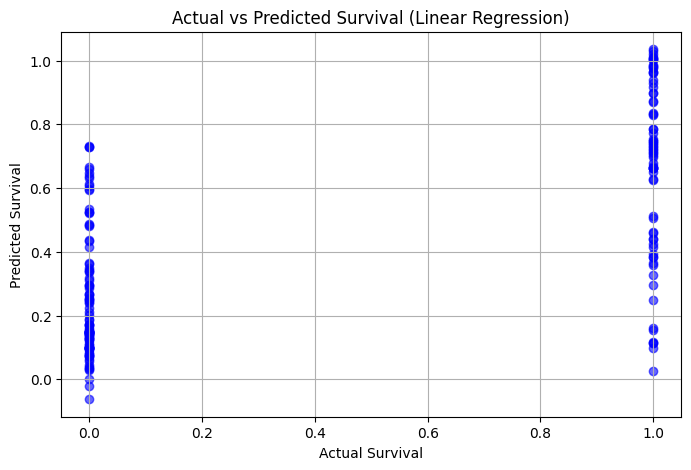

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.xlabel("Actual Survival")
plt.ylabel("Predicted Survival")
plt.title("Actual vs Predicted Survival (Linear Regression)")
plt.grid(True)
plt.show()

💾 13. Save and Download Predictions

We save the predicted vs actual results into a CSV file for further analysis or submission.

In [ ]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results.to_csv("titanic_predictions.csv", index=False)
files.download("titanic_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 14. Save and Download Cleaned Dataset

We also save the cleaned dataset (with encoded and filled data) for future use or model training.


In [ ]:
df.to_csv("titanic_cleaned.csv", index=False)
files.download("titanic_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>